# Phase I Analysis

In [109]:
from aequitas.bias import Bias
from aequitas.group import Group
from aequitas.fairness import Fairness
from ml_utils import Pipeline
import pandas as pd
import numpy as np
import datetime
import logging
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

## Load and Process Data

In [110]:
pd.options.display.max_colwidth = 500
rfdf = pd.read_csv('test_run_RF_DT_BAG_BASEDT.csv')
gb = pd.read_csv('test_run_gb_bl.csv')
nb = pd.read_csv('test_run_NB.csv')
knn = pd.read_csv('test_run_knn_01.csv')
lr = pd.read_csv('LR.csv')
svc = pd.read_csv('test_run_svc.csv')

results = rfdf.append(gb)
results = results.append(nb)
results = results.append(knn)
results = results.append(lr)
results = results.append(svc)

prefix = '(datetime.datetime('
pref_len = len(prefix)
results['year'] = results['testing_dates'].str.slice(start=pref_len, stop=pref_len+4)


## Model Comparisons

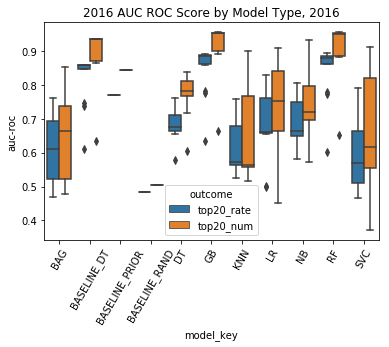

In [111]:
df_2016 = results[results['year'] == '2016']
#results.tail()
sns.boxplot(x='model_key', y='auc-roc', hue='outcome', data =df_2016.sort_values(by='model_key'))
plt.title("2016 AUC ROC Score by Model Type, 2016")
plt.xticks(rotation=60)
plt.rcParams['figure.figsize'] = [10, 8]

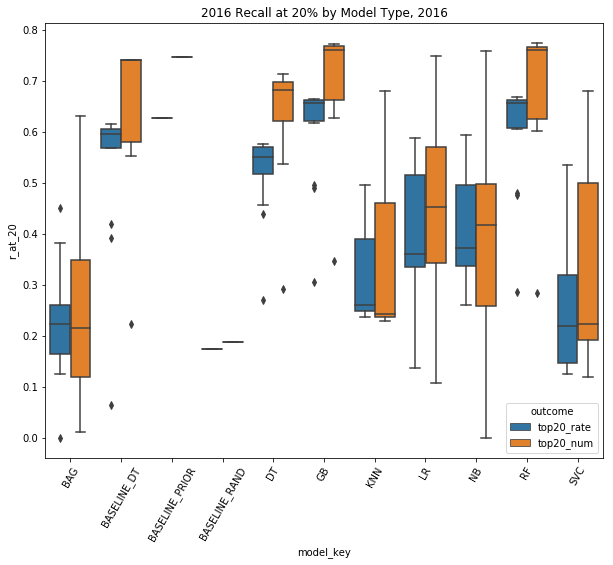

In [112]:
df_2016 = results[results['year'] == '2016']
#results.tail()
sns.boxplot(x='model_key', y='r_at_20', hue='outcome', data =df_2016.sort_values(by='model_key'))
plt.title("2016 Recall at 20% by Model Type, 2016")
plt.xticks(rotation=60)
plt.rcParams['figure.figsize'] = [10, 8]

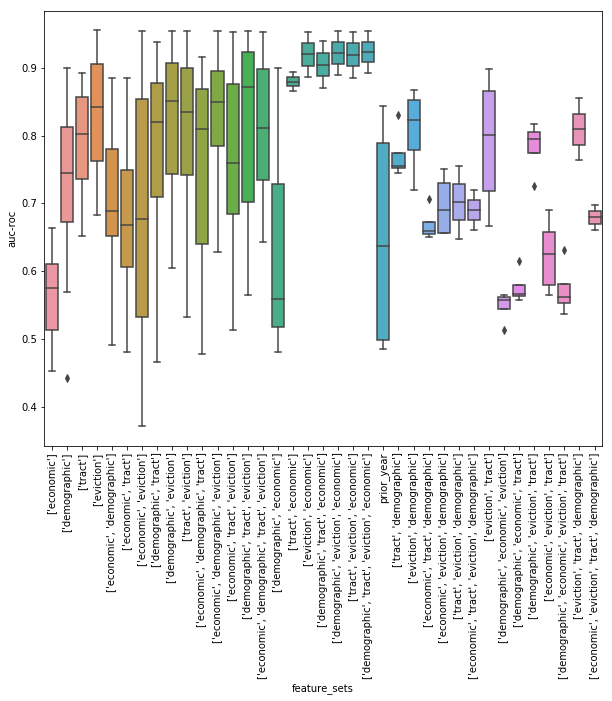

In [113]:
sns.boxplot(x='feature_sets',y='auc-roc',data=results[results['year']=='2016'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [6,6]